In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabeties.csv')
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
glocose      768 non-null int64
bp           768 non-null int64
skin         768 non-null int64
insulin      768 non-null int64
bmi          768 non-null float64
predigree    768 non-null float64
age          768 non-null int64
target       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

In [5]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


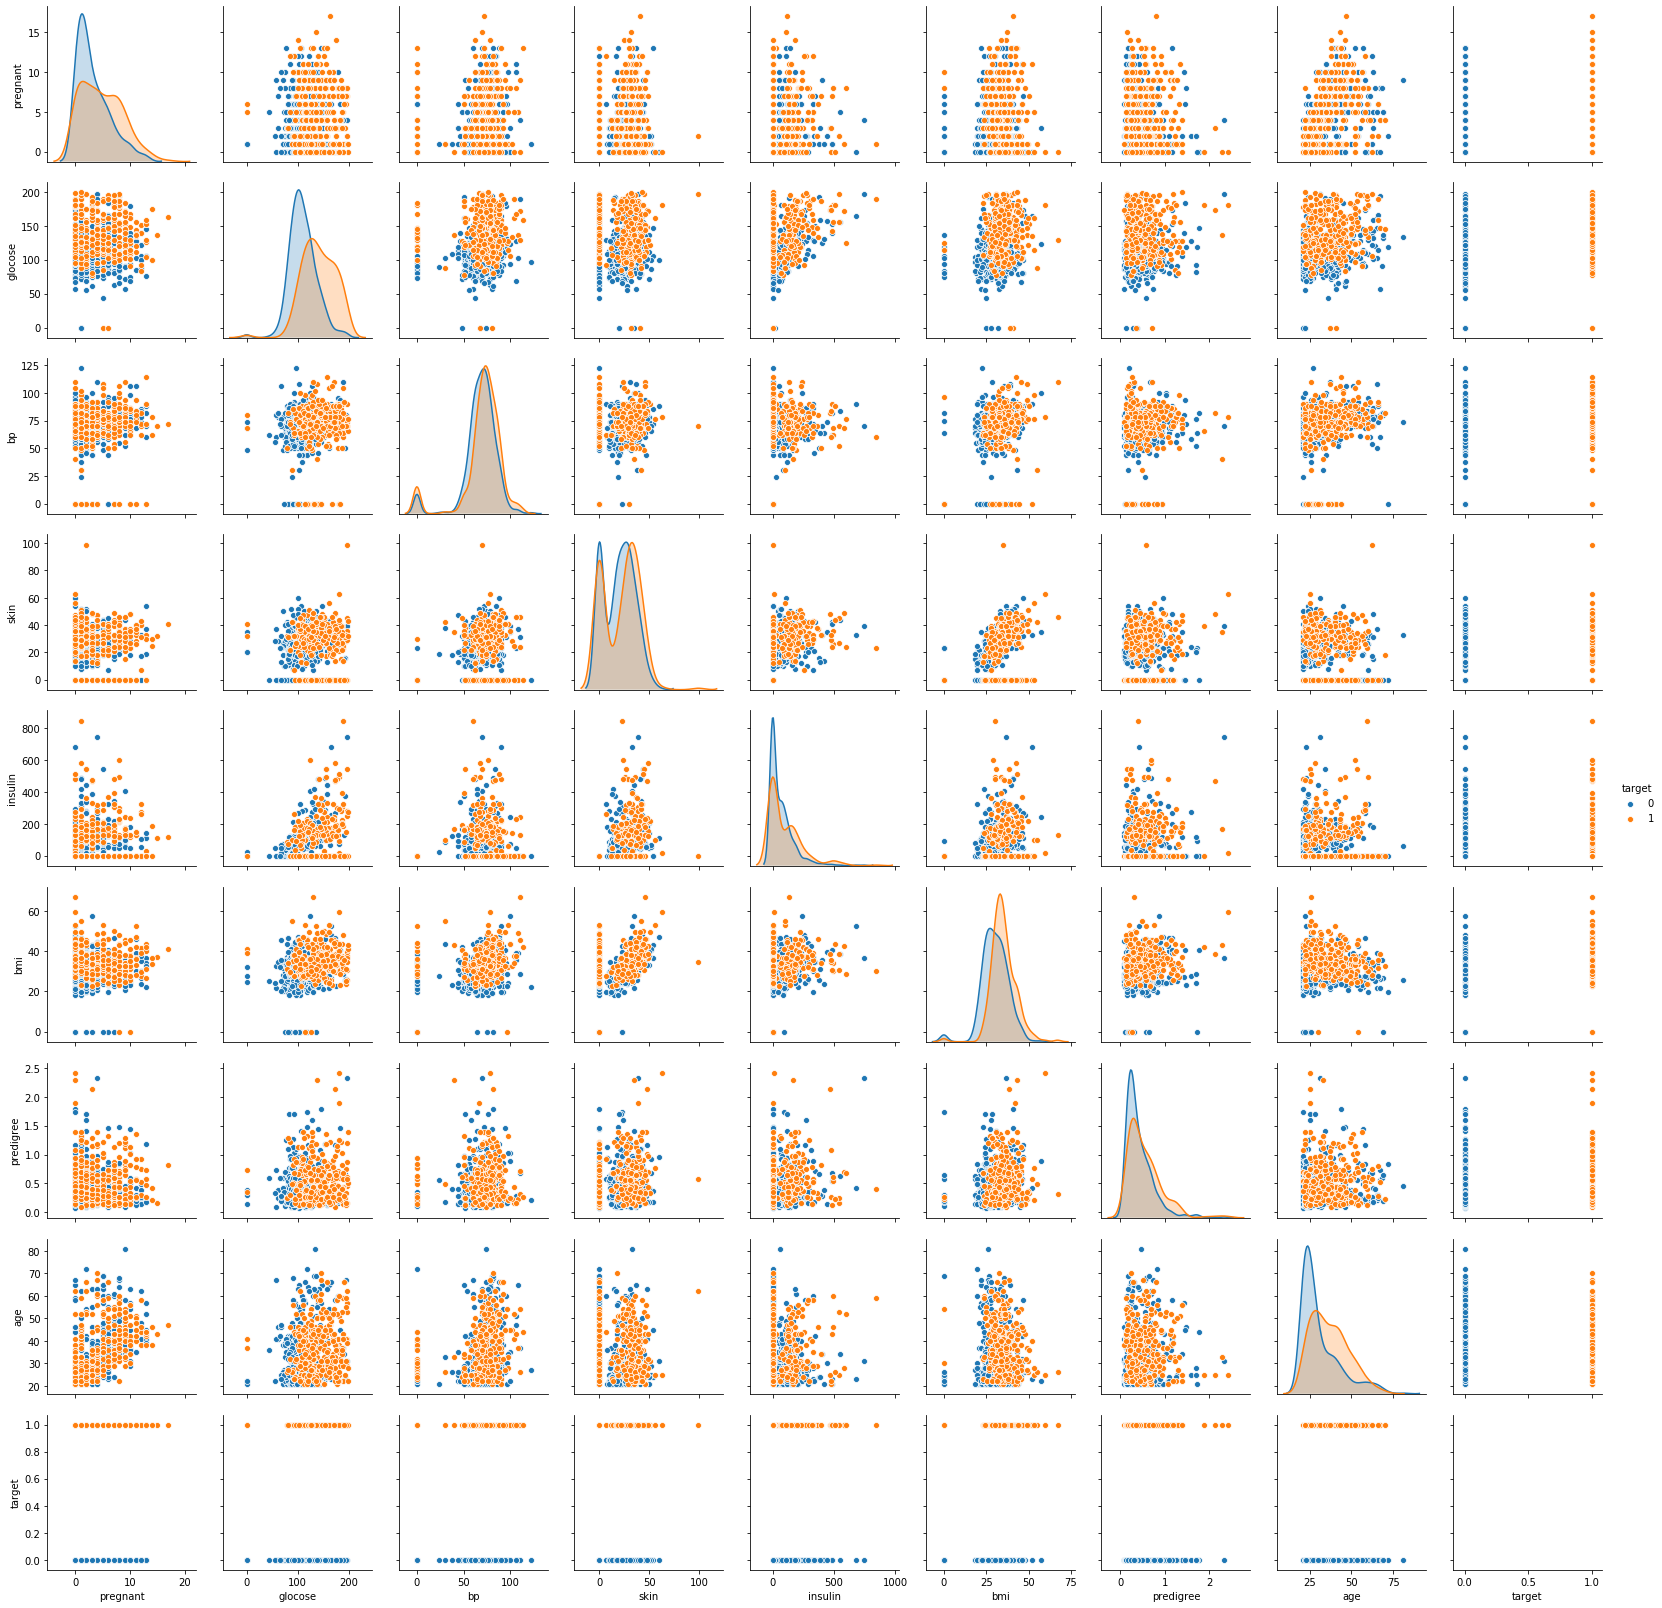

In [6]:
sns.pairplot(data=df,hue='target')

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

# KNN

In [9]:
#inport model from package
from sklearn.neighbors import KNeighborsClassifier
#create the object
knn=KNeighborsClassifier(n_neighbors=5)
#train the model
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
ypred=knn.predict(xtest)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
score=accuracy_score(ytest,ypred)
score

0.7532467532467533

In [13]:
accuracy=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

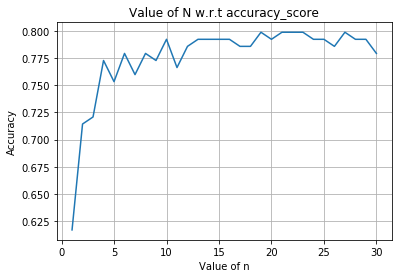

In [14]:
plt.plot(range(1,31),accuracy)
plt.title('Value of N w.r.t accuracy_score')
plt.ylabel('Accuracy')
plt.xlabel('Value of n')
plt.grid(True)
plt.show()

In [15]:
#create the object
knn=KNeighborsClassifier(n_neighbors=18)
#train the model
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [16]:
ypred=knn.predict(xtest)

In [17]:
score=accuracy_score(ytest,ypred)
score

0.7857142857142857

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg=LogisticRegression()

In [20]:
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
ypred1=logreg.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(ytest,ypred1)}')

Accuracy: 0.8181818181818182


In [23]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred1=logreg.predict(xtest)

In [24]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(ytest,ypred1)}')

Accuracy: 0.8181818181818182


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

# classification_report

In [26]:
print(f'Report: {classification_report(ytest,ypred1)}')

Report:               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



# confusion_matrix

In [27]:
print(confusion_matrix(ytest,ypred))

[[98  9]
 [24 23]]


In [28]:
print(f'Actual Values   : {ytest[:25]}')
print(f'Predicted values: {ypred[:25]}')

Actual Values   : [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Predicted values: [1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [29]:
ypredprob=logreg.predict_proba(xtest)[:,1]

In [30]:
ypredprob

array([0.90586069, 0.20856694, 0.14485692, 0.6041101 , 0.17702214,
       0.07346671, 0.69327597, 0.74903953, 0.43636364, 0.35778097,
       0.55055045, 0.90130668, 0.3057563 , 0.24667083, 0.16885634,
       0.20657203, 0.81291448, 0.06857224, 0.38429596, 0.31881472,
       0.5757149 , 0.37466876, 0.37892077, 0.08788033, 0.10119407,
       0.38889244, 0.08619463, 0.83905182, 0.17753048, 0.20773119,
       0.46808191, 0.27872703, 0.12633314, 0.48095144, 0.18049542,
       0.66731758, 0.46873623, 0.12748622, 0.4000243 , 0.70364471,
       0.31401217, 0.22595939, 0.2371968 , 0.77043161, 0.69797844,
       0.03226948, 0.1535491 , 0.27777128, 0.38823776, 0.3160962 ,
       0.45245837, 0.26460419, 0.8209188 , 0.45859413, 0.17434637,
       0.01161946, 0.1073059 , 0.42202313, 0.31910697, 0.26583421,
       0.61701795, 0.46595961, 0.16760016, 0.75200839, 0.64027397,
       0.85737861, 0.6429783 , 0.18963785, 0.41877957, 0.15671751,
       0.18262683, 0.57012142, 0.13877062, 0.87552585, 0.76628

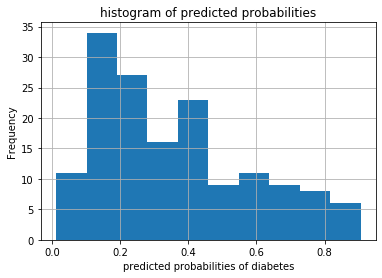

In [31]:
plt.hist(ypredprob)
plt.title("histogram of predicted probabilities")
plt.xlabel('predicted probabilities of diabetes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
from sklearn.preprocessing import binarize

In [33]:
ypred=binarize([ypredprob],threshold=0.30)[0] #2d -> 1d

In [34]:
print(f'Actual Values   : {ytest[:25]}')
print(f'Predicted values: {(ypred[:25].astype(int))}')

Actual Values   : [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Predicted values: [1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0]


# Auc_roc_curve

In [35]:
from sklearn.metrics import roc_curve

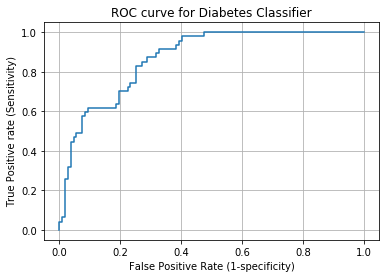

In [36]:
fpr,tpr,three = roc_curve(ytest,ypredprob)
plt.plot(fpr,tpr)
plt.title('ROC curve for Diabetes Classifier')
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
plt.grid(True)
plt.show()